In [1]:
#import numba
import ssms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# simulators
@numba.jit(nopython=True)
def ddm(v=0, a=1, w=0.5, tau=0, s=1, dt=0.001, t_max=20):
    """
    Simulate a single trial of the 4-param drift diffusion process.
    """
    s_sqrtdt = s * np.sqrt(dt)
    n_steps = int(t_max / dt + 1)
    noise = np.random.normal(0, 1, size=n_steps) * s_sqrtdt
    x = w * a
    t, i = 0, 0
    while (t <= t_max) and (x >= 0) and (x <= a):
        # drift + diffusion, increment time
        x += v * dt + noise[i]
        t += dt
        i += 1
    return t + tau, np.sign(x)

@numba.jit(nopython=True)
def ddm_batch_python(v, a, w, tau, dt, t_max, num_trials, seed):
    """
    Simulate multiple trials of DDM per param configuration.
    """
    num_params = np.shape(v)[0]
    rt = np.zeros((num_params, num_trials))
    c = np.zeros((num_params, num_trials))

    # set seed
    np.random.seed(seed)
    for i_p in range(num_params):
        for i_t in range(num_trials):
            # loop simulator
            rt[i_p, i_t], c[i_p, i_t] = ddm(
                v[i_p], a[i_p], w[i_p], tau[i_p], dt=dt, t_max=t_max
            )

    return rt, c

NameError: name 'numba' is not defined

In [29]:
start_t = time()
for i in range(100):
    out = ddm_batch_python(v = np.array([0.0]), a = np.array([1.0]), w = np.array([0.5]), tau = np.array([0.001]), dt = 0.001, t_max = 20, num_trials = 1000, seed = 42)
elapsed = time() - start_t

print(elapsed / 100)

0.6845796298980713


In [4]:
from time import time
#for 
#for i in range(100)out[0].shape

In [11]:
ssms.config.model_config[model]['default_params']

[0.0, 1.0, 0.5, 0.001]

In [6]:
model = 'ddm'

start_t = time()
for i in range(100):
    ssms.basic_simulators.simulator(theta = ssms.config.model_config[model]['default_params'],
                                    model = model,
                                    n_samples = 10000)
elapsed = time() - start_t

print(elapsed / 100)

0.6905571174621582


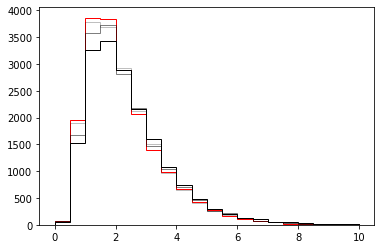

In [37]:
model = 'ddm_mic2'
d_s = [0, 0.25, 0.5, 1]
for d in d_s:
    theta = [1.0, 1.0, 1.0, 1.75, 0.5, 0.5, 0.5, d, 0]
    out = ssms.basic_simulators.simulator(theta = theta,
                                          model = model,
                                          n_samples = 20000)
    
    if d == 0:
        plt.hist(out['rts'][out['choices'] == 3], range = (0, 10), bins = 20, histtype = 'step', color = 'red')
    else:
        plt.hist(out['rts'][out['choices'] == 3], range = (0, 10), bins = 20, histtype = 'step', alpha = d, color = 'black')

In [10]:
ssms.config.model_config['ddm_mic2']


{'name': 'ddm_mic2',
 'params': ['vh', 'vl1', 'vl2', 'a', 'zh', 'zl1', 'zl2', 'd', 't'],
 'param_bounds': [[-2.5, -2.5, -2.5, 0.3, 0.2, 0.2, 0.2, 0.0, 0.0],
  [2.5, 2.5, 2.5, 2.0, 0.8, 0.8, 0.8, 1.0, 2.0]],
 'boundary': <function ssms.basic_simulators.boundary_functions.constant(t=0)>,
 'n_params': 9,
 'default_params': [0.0, 0.0, 0.0, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5],
 'hddm_include': ['vh', 'vl1', 'vl2', 'a', 'zh', 'zl1', 'zl2', 'd', 't'],
 'nchoices': 4}

(array([1.540e+02, 1.608e+03, 2.245e+03, 1.798e+03, 1.257e+03, 7.410e+02,
        5.050e+02, 3.220e+02, 1.950e+02, 1.140e+02, 7.600e+01, 3.800e+01,
        2.100e+01, 1.100e+01, 1.100e+01, 6.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ],
       dtype=float32),
 <BarContainer object of 20 artists>)

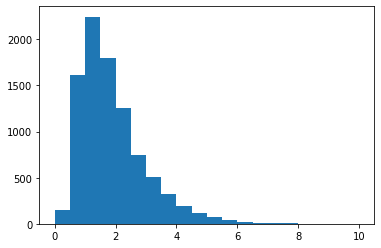

In [7]:
ssms.config.model_config['ddm']

{'name': 'ddm',
 'params': ['v', 'a', 'z', 't'],
 'param_bounds': [[-3.0, 0.3, 0.1, 0.0], [3.0, 2.5, 0.9, 2.0]],
 'boundary': <function ssms.basic_simulators.boundary_functions.constant(t=0)>,
 'n_params': 4,
 'default_params': [0.0, 1.0, 0.5, 0.001],
 'hddm_include': ['z'],
 'nchoices': 2}

In [39]:
import os

files_ = os.listdir('/users/afengler/batch_job_out/')
files_imp = ['/users/afengler/batch_job_out/' + file_ for file_ in files_ if '1972244' in file_]

In [59]:
str_list = []
for file_ in files_imp:
    f = open(file_, 'r')
    x = f.read()
    f.close()
    str_list.append(x.split('\n')[-3])
    


In [61]:
from iteration_utilities import duplicdates
str_list

ModuleNotFoundError: No module named 'iteration_utilities'

In [50]:
x = x.split('\n')

In [63]:
import collections
print([item for item, count in collections.Counter(str_list).items() if count > 1])

[]


In [56]:
f

<_io.TextIOWrapper name='/users/afengler/batch_job_out/data_generator_1972244_257.out' mode='r' encoding='UTF-8'>

In [3]:
#collections.Counter(str_list)

In [4]:
#str_list

In [75]:
files_ = os.listdir('/users/afengler/data/proj_lan_pipeline/LAN_scripts/data/lan_mlp/training_data_0_nbins_0_n_200000')
files_imp = ['/users/afengler/data/proj_lan_pipeline/LAN_scripts/data/lan_mlp/training_data_0_nbins_0_n_200000/' + file_ for file_ in files_ if 'lca_no_bias' in file_]

In [72]:
len(files_imp)

515

In [76]:
import pickle
myf = pickle.load(open(files_imp[0], 'rb'))

In [83]:
(myf['data'][:, -1] == 0).sum()

495683

In [86]:
(myf['data'][:, -1] == 3).sum()

496438

In [37]:
# condition 211
model = 'ddm_par2'
theta = [1.4, -2.0, 0.75, 1.3, 0.5, 0.5, 0.5, 0.2]
n_samples = 10000

out = ssms.basic_simulators.simulator(theta = theta,
                                model = model,
                                n_samples = n_samples)

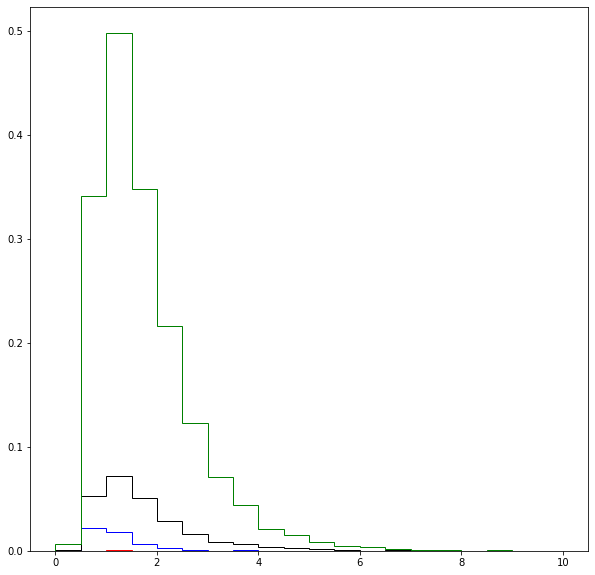

In [38]:
#fig = plt.figure(figsize=(10, 10))
plt.figure(figsize=(10, 10))
color = ['blue', 'red', 'black', 'green']
for j in range(4):
    #plt.subplot(4,4,i*2,xlim=(0,10),ylim=(0,0.8))
    plt.hist(out['rts'][out['choices'] == j],
            density=False,
            histtype = 'step',
            color = color[j],
            range=(0,10),
            bins=20,
            weights=np.ones(out['rts'][out['choices'] == j].shape[0])/ (n_samples * 0.5))
    #plt.title('par2 {}'.format(cond_keys[i-1]))
#for i in range(1,9):


In [41]:
# condition 212
model = 'ddm_par2'
theta = [1.55, -2.0, 1.5, 1.3, 0.5, 0.5, 0.5, 0.2]
n_samples = 10000

out = ssms.basic_simulators.simulator(theta = theta,
                                model = model,
                                n_samples = n_samples)

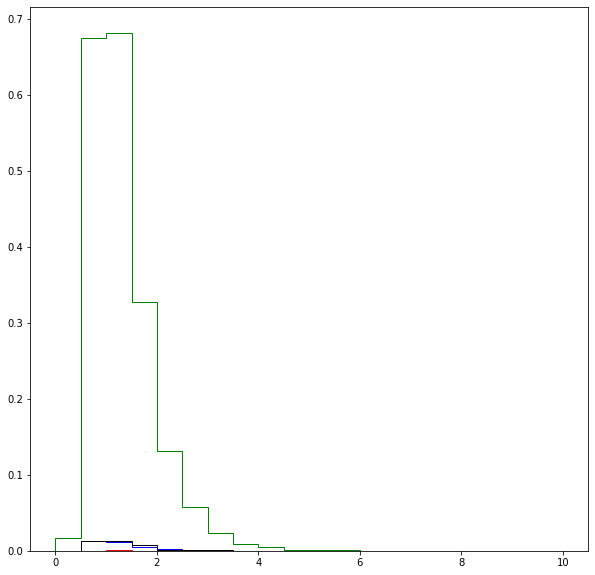

In [42]:
#import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
color = ['blue', 'red', 'black', 'green']
for j in range(4):
    #plt.subplot(4,4,i*2,xlim=(0,10),ylim=(0,0.8))
    plt.hist(out['rts'][out['choices'] == j],
            density=False,
            histtype = 'step',
            color = color[j],
            range=(0,10),
            bins=20,
            weights=np.ones(out['rts'][out['choices'] == j].shape[0])/ (n_samples * 0.5))
    #plt.title('par2 {}'.format(cond_keys[i-1]))
#for i in range(1,9):


In [43]:
# condition 111
model = 'ddm_par2'
theta = [0.6, 1.15, 0.67, 1.3, 0.5, 0.5, 0.5, 0.21]
n_samples = 10000

out = ssms.basic_simulators.simulator(theta = theta,
                                model = model,
                                n_samples = n_samples)

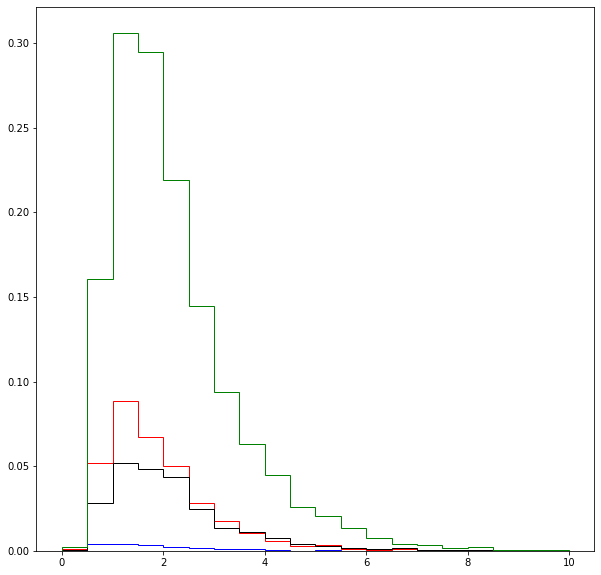

In [44]:
#import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
color = ['blue', 'red', 'black', 'green']
for j in range(4):
    #plt.subplot(4,4,i*2,xlim=(0,10),ylim=(0,0.8))
    plt.hist(out['rts'][out['choices'] == j],
            density=False,
            histtype = 'step',
            color = color[j],
            range=(0,10),
            bins=20,
            weights=np.ones(out['rts'][out['choices'] == j].shape[0])/ (n_samples * 0.5))
    #plt.title('par2 {}'.format(cond_keys[i-1]))
#for i in range(1,9):


In [45]:
# condition 222
model = 'ddm_par2'
theta = [1.5, -2., 1.5, 1.3, 0.5, 0.5, 0.5, 0.21]
n_samples = 10000

out = ssms.basic_simulators.simulator(theta = theta,
                                model = model,
                                n_samples = n_samples)

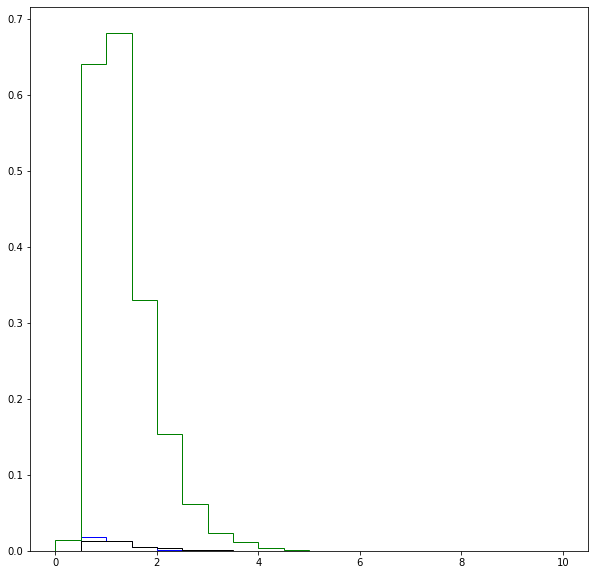

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
color = ['blue', 'red', 'black', 'green']
for j in range(4):
    #plt.subplot(4,4,i*2,xlim=(0,10),ylim=(0,0.8))
    plt.hist(out['rts'][out['choices'] == j],
            density=False,
            histtype = 'step',
            color = color[j],
            range=(0,10),
            bins=20,
            weights=np.ones(out['rts'][out['choices'] == j].shape[0])/ (n_samples * 0.5))
    #plt.title('par2 {}'.format(cond_keys[i-1]))
#for i in range(1,9):
